In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
header_names = []
with open("spambase.names", "r") as f:
    for line in f:
        match = re.match(r"^([^:]+):\s+continuous\.", line)
        if match:
            header_names.append(match.group(1))
header_names.append("Class")
len(header_names)

# header_names

58

In [3]:
data = pd.read_csv("spambase.data", header=None, names=header_names)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
X = data.iloc[:, :57]
y = data.iloc[:, 57]

### Part 1

[Text(0.5833333333333334, 0.9, 'x[52] <= 0.056\ngini = 0.478\nsamples = 4601\nvalue = [2788, 1813]'),
 Text(0.35714285714285715, 0.7, 'x[6] <= 0.055\ngini = 0.36\nsamples = 3471\nvalue = [2655, 816]'),
 Text(0.19047619047619047, 0.5, 'x[51] <= 0.378\ngini = 0.275\nsamples = 3141\nvalue = [2625, 516]'),
 Text(0.09523809523809523, 0.3, 'x[15] <= 0.2\ngini = 0.181\nsamples = 2737\nvalue = [2462, 275]'),
 Text(0.047619047619047616, 0.1, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.2857142857142857, 0.3, 'x[56] <= 55.5\ngini = 0.481\nsamples = 404\nvalue = [163, 241]'),
 Text(0.23809523809523808, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.5238095238095238, 0.5, 'x[26] <= 0.14\ngini = 0.165\nsamples = 330\nvalue = [30, 300]'),
 Text(0.47619047619047616, 0.3, 'x[45] <= 0.115\ngini = 0.102\nsamples = 317\nvalue = [17, 300]'),
 Text(0.42857142857142855, 0.1, '\n  (...)  \n'),
 Text(0.5238095238095238, 0.1, '\n  (...)  \n'),
 Te

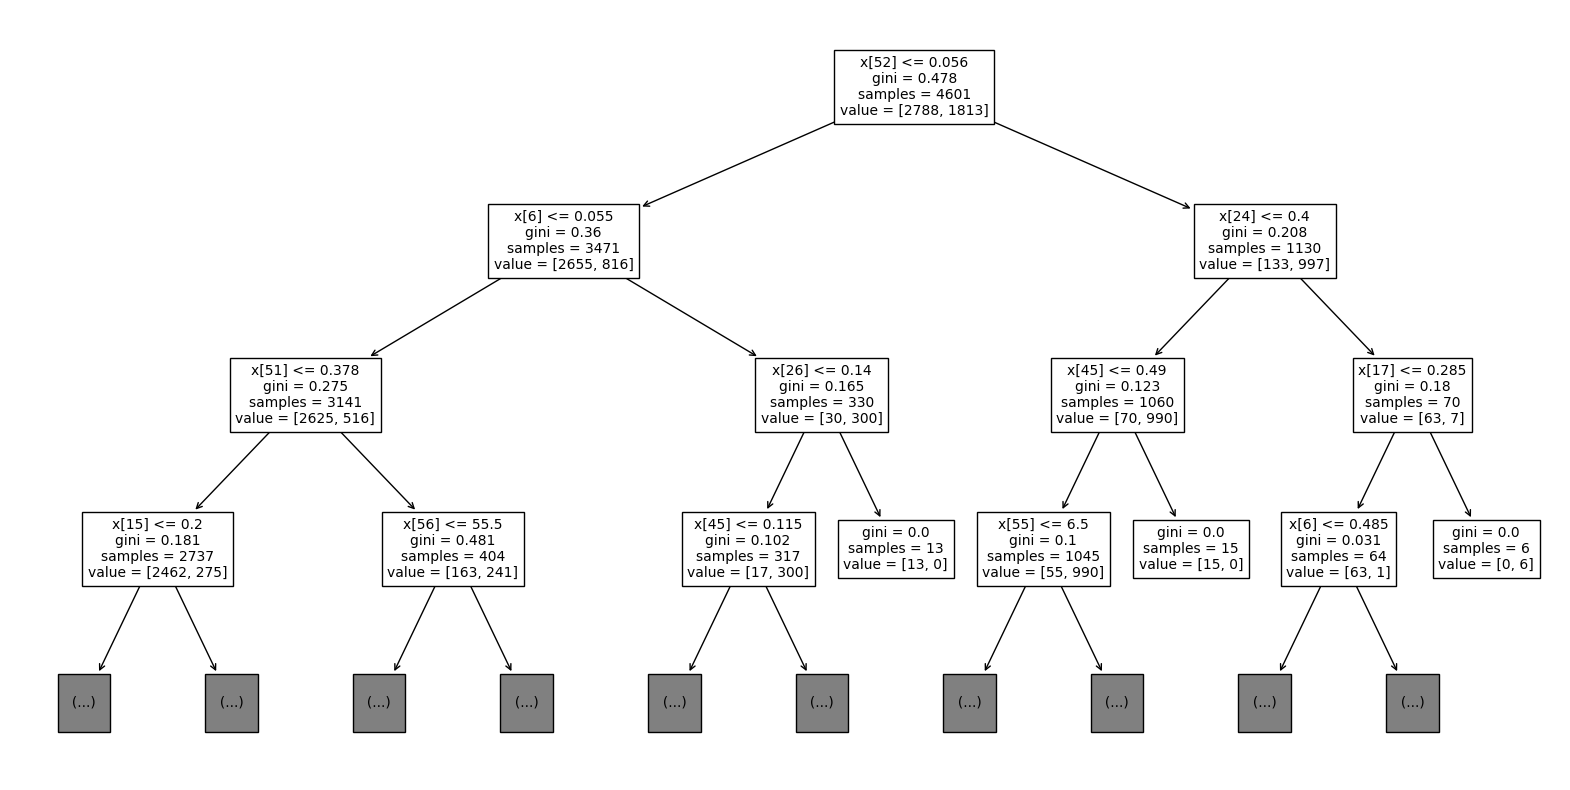

In [6]:
dt_clf = DecisionTreeClassifier().fit(X, y)

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_clf, max_depth=3, fontsize=10)

### Part 2

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, random_state=123, shuffle=True
)

In [8]:
dt_clf2 = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt_clf2.predict(X_test)

dt_test_error = 1 - accuracy_score(y_test, dt_pred)
dt_test_error

0.08427454387489142

In [9]:
trees = np.arange(1, 301)
test_error = []

for tree in trees:
    rf_clf = RandomForestClassifier(n_estimators=tree, n_jobs=-1, random_state=123).fit(
        X_train, y_train
    )
    rf_pred = rf_clf.predict(X_test)
    test_error.append(1 - accuracy_score(y_test, rf_pred))

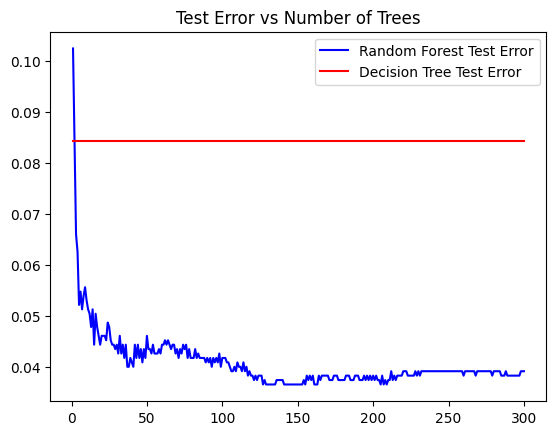

In [10]:
dt_test_error = np.ones(len(test_error)) * dt_test_error

plt.plot(trees, test_error, label="Random Forest Test Error", color="blue")
plt.plot(trees, dt_test_error, label="Decision Tree Test Error", color="red")
plt.title("Test Error vs Number of Trees")
plt.legend()

### Part 3

In [11]:
feature_num = np.arange(1, 58)
oob_error = []
test_error = []

for feature in feature_num:
    rf_clf = RandomForestClassifier(
        max_features=feature, random_state=123, n_jobs=-1, oob_score=True
    ).fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    oob_error.append(1 - rf_clf.oob_score_)
    test_error.append(1 - accuracy_score(y_test, pred))

Text(0, 0.5, 'Error')

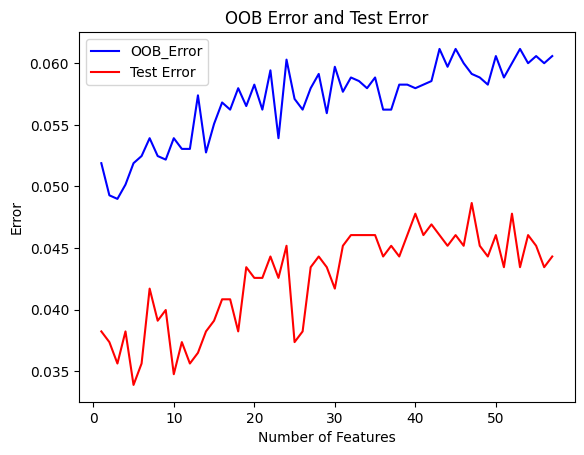

In [12]:
plt.plot(feature_num, oob_error, label="OOB_Error", color="blue")
plt.plot(feature_num, test_error, label="Test Error", color="red")
plt.title("OOB Error and Test Error")
plt.legend()
plt.xlabel("Number of Features")
plt.ylabel("Error")

### Part 4

In [14]:
params = {"gamma": np.logspace(-4, 1, 20), "nu": np.linspace(0.01, 0.7, 15)}

non_spam = X_train[y_train == 0]
non_spam_labels = y_train[y_train == 0]

grid = GridSearchCV(OneClassSVM(), params, n_jobs=-1, scoring="accuracy")
grid.fit(non_spam, non_spam_labels)

print(f"Best parameters are {grid.best_estimator_}")

pred = grid.best_estimator_.predict(X_test)
pred_labels = np.where(pred == 1, 0, 1)

test_error = 1 - accuracy_score(y_test, pred_labels)


test_error

Best parameters are OneClassSVM(gamma=0.0001, nu=0.01)


0.34057341442224154